# Building Functions

#### Functions are incredibly useful for many applications including data analysis. They can perform statistical analysis, algorithms for sorting, and much much more. 

 syntax for building funtions: 
     
 def functionname(parameter list):
 
        /* instructions for funtion to transform data /*
     
     
 
        

To start, we will build statistical funtions that take data and return basic statistical summaries including total, mean, median, mode, range, etc. 

In [33]:
    def total(list_obj):
        total = 0
        n = len(list_obj)
        for i in range(n):
            total += list_obj[i]
        return total
    
    def mean(list_obj):
        n = len(list_obj)
        mean_ = total(list_obj) / n
        return mean_ 
    
    def median(list_obj):
        n = len(list_obj)
        list_obj = sorted(list_obj)
        # lists of even length divided by 2 have a remainder
        if n % 2 != 0:
            # list length is odd
            middle_index = int((n - 1) / 2)
            median_ = list_obj[middle_index]
        else:
            upper_middle_index = int(n / 2)
            lower_middle_index = upper_middle_index - 1
            # pass slice with two middle values to self.mean()
            median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
        return median_
    
    def mode(list_obj):
        # use to record value(s) that appear most times
        max_count = 0
        # use to count occurrences of each value in list
        counter_dict = {}
        for value in list_obj:
            # count for each value should start at 0
            counter_dict[value] = 0
        for value in list_obj:
            # add on to the count of the value for each occurrence in list_obj
            counter_dict[value] += 1
        # make a list of the value (not keys) from the dictionary
        count_list = list(counter_dict.values())
        # and find the max value
        max_count = max(count_list)
        # use a generator to make a list of the values (keys) whose number of 
        # occurences in the list match max_count
        mode_ = [key for key in counter_dict if counter_dict[key] == max_count]

        return mode_
    
    def variance(list_obj, sample = False):

        # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
        # save mean value of list
        list_mean = mean(list_obj)
        # use n to calculate average of sum squared diffs
        n = len(list_obj)
        # create value we can add squared diffs to
        sum_sq_diff = 0
        for val in list_obj:
            # adds each squared diff to sum_sq_diff
            sum_sq_diff += (val - list_mean) ** 2
        if sample == False:
            # normalize result by dividing by n
            variance_ = sum_sq_diff / n
        else:
            # for samples, normalize by dividing by (n-1)
            variance_ = sum_sq_diff / (n - 1)

        return variance_
    
    def SD(list_obj, sample = False):
        SD_ = variance(list_obj, sample) ** (1/2)
        
        return SD_
    
    def covariance(list_obj1, list_obj2, sample = False):
        # determine the mean of each list
        mean1 = mean(list_obj1)
        mean2 = mean(list_obj2)
        # instantiate a variable holding the value of 0; this will be used to 
        # sum the values generated in the for loop below
        cov = 0
        n1 = len(list_obj1)
        n2 = len(list_obj2)
        # check list lengths are equal
        if n1 == n2:
            n = n1
            # sum the product of the differences
            for i in range(n1):
                cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
            if sample == False:
                cov = cov / n
            # account for sample by dividing by one less than number of elements in list
            else:
                cov = cov / (n - 1)
            # return covariance
            return cov
        else:
            print("List lengths are not equal")
            print("List1:", n1)
            print("List2:", n2)

    def correlation(list_obj1, list_obj2):
        # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
        cov = covariance(list_obj1, list_obj2)
        SD1 = SD(list_obj1)
        SD2 = SD(list_obj2)
        corr = cov / (SD1 * SD2)
        
        return corr
    
    def skewness(list_obj, sample = False):
        mean_ = mean(list_obj)
        SD_ = SD(list_obj, sample)
        skew = 0
        n = len(list_obj)
        for val in list_obj:
            skew += (val - mean_) ** 3
            skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)

        return skew
    
    def kurtosis(list_obj, sample = False):
        mean_ = mean(list_obj)
        kurt = 0
        SD_ = SD(list_obj, sample)
        n = len(list_obj)
        for x in list_obj:
            kurt += (x - mean_) ** 4
        kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
        ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))

        return kurt

now we must create a function to gather all of these stats from a given dataset 

In [34]:
# function that allow us to pass a dataset and return summary statistics 
import pandas as pd

def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

time to install pandas datareader

In [ ]:
!pip install pandas-datareader

# the time has come to download stock data (to trade dogecoin)

In [4]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()
print(start, end)

2012-01-01 00:00:00 2021-09-30 10:39:58.583064


need to create dictionary to hold our stock data with keys corresponding to our stoick tickers 


Pandas datareader is incredibly powerful. I had looked for awhile in my project for the best place to pull stock data from for my project, and it was hard. I thought I would have to get an API key and register and still wouldnt have acces to any up-to-date data. But, with datareader, in two lins of code i can import any stocks I want and it will be perfectly recent. 

In [5]:
data_dct = {}
stocks = ['MSFT', 'AAPL', 'FB', 'TSLA']
for key in stocks: 
    data_dct[key] = web.DataReader(key, 'yahoo', start, end)

In [6]:
data_dct

{'MSFT':                   High         Low        Open       Close      Volume  \
 Date                                                                     
 2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
 2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
 2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
 2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
 2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
 ...                ...         ...         ...         ...         ...   
 2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
 2021-09-27  296.470001  292.940002  296.140015  294.170013  23571700.0   
 2021-09-28  290.779999  282.750000  289.799988  283.519989  43186200.0   
 2021-09-29  286.769989  283.010010  285.100006  284.000000  26319400.0   
 2021-09-30  287.829987  284.823792  285.709991  284.875000   9299660.0   
 
              A

In [7]:
data_dct.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

the pandas concat function allows us to merge multiple data columns into one dataframe. This is useful as we can merge all of our stocks prices into one dataframe 

In [8]:
close_data = pd.concat((val["Close"] for val in data_dct.values()), 
                       keys = data_dct.keys(), # specifies column names 
                       axis = 1) # axis = 1 says to merge horizontally 
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-09-24,299.350006,146.919998,352.959991,774.390015
2021-09-27,294.170013,145.369995,353.579987,791.359985
2021-09-28,283.519989,141.910004,340.649994,777.559998


Text(0.5, 1.0, 'Daily Closing Stock Prices')

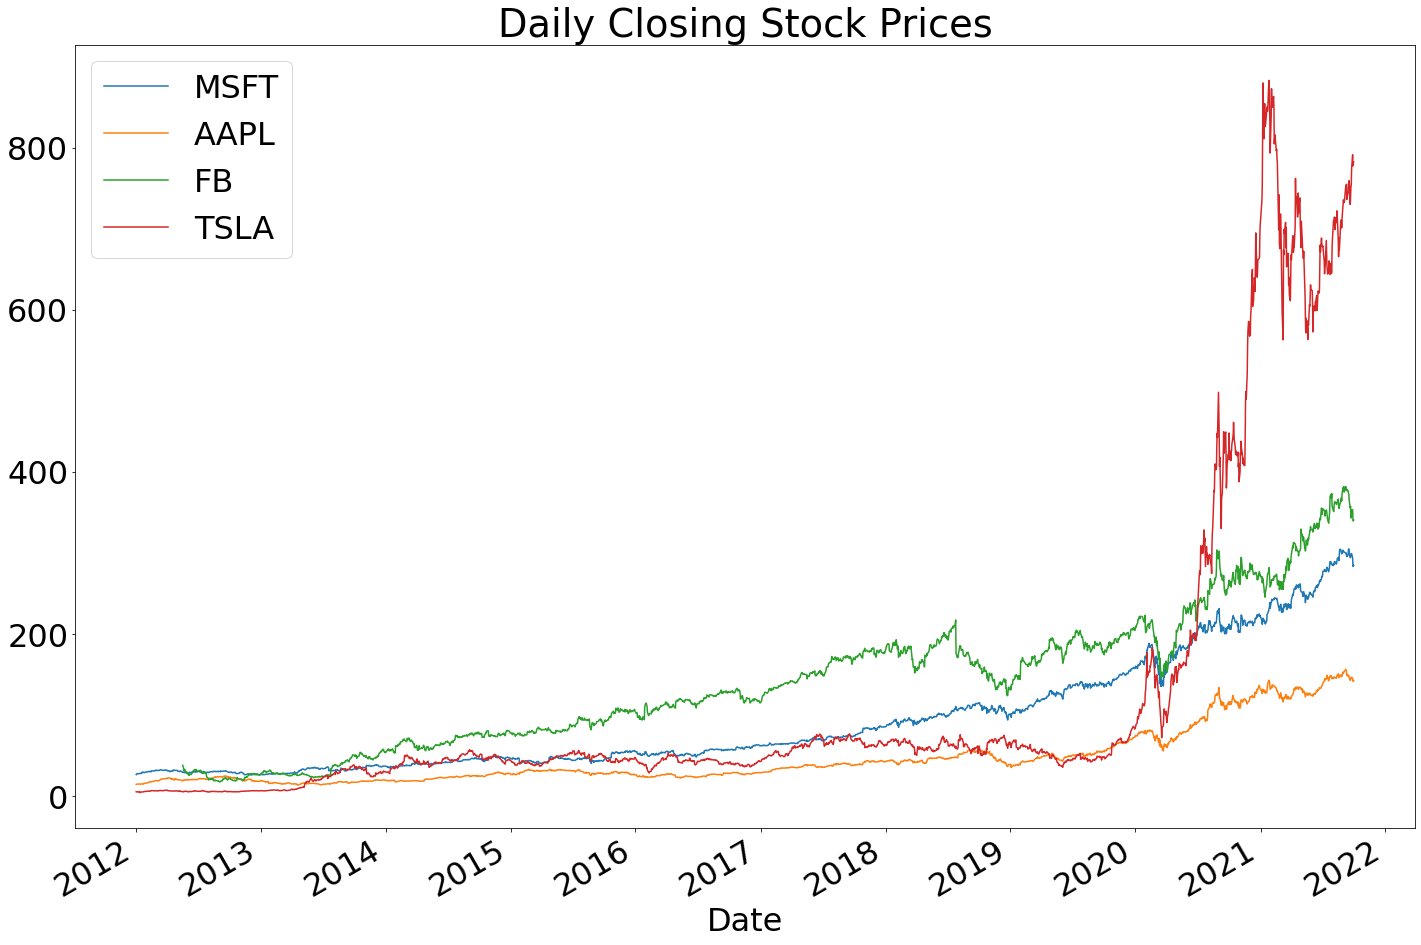

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":32})
fig, ax =  plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
plt.title('Daily Closing Stock Prices')

it is helpful to display y axis as a log scale to view change in proportion

<ipython-input-10-774dd8606f6c>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals]) # change out of scientific notation


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000'),
 Text(0, 100000.0, '100000')]

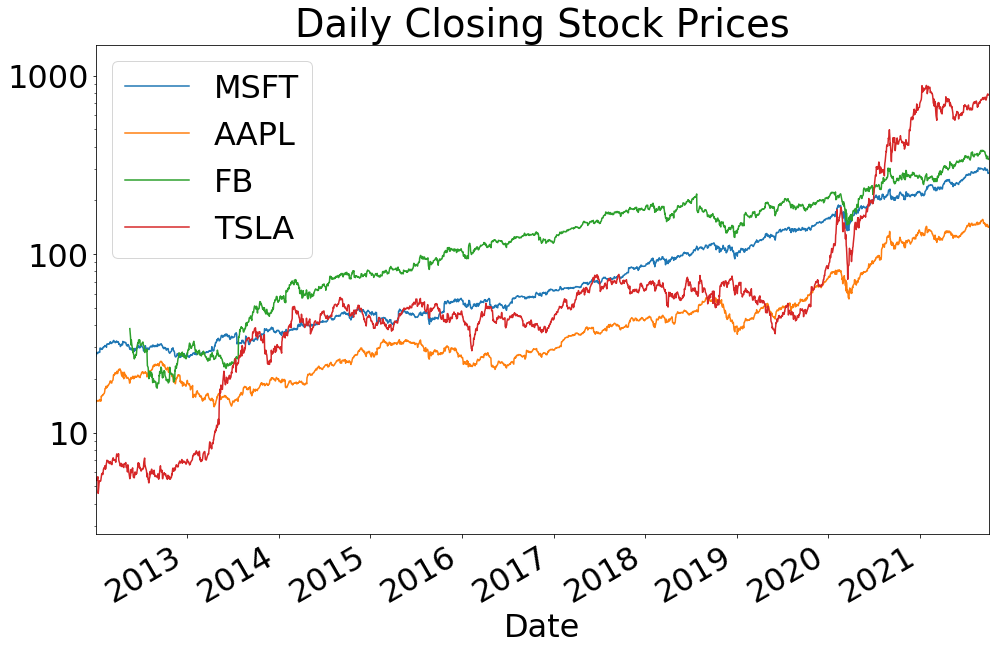

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.1
fig, ax =  plt.subplots(figsize = (16, 10))
close_data.plot.line(ax = ax, legend = True)
plt.title('Daily Closing Stock Prices')
ax.set_yscale('log')
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals]) # change out of scientific notation


## Visualizing percent change
the percent change helps us make better relative comparisons between stocks: 




In [11]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100
price_change_data


,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537408,NaN,-1.317670
2012-01-05,1.021900,1.110200,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2021-09-24,-0.070100,0.061293,2.023355,2.753304
2021-09-27,-1.730413,-1.054998,0.175656,2.191398
2021-09-28,-3.620364,-2.380128,-3.656879,-1.743832


<ipython-input-12-7ea56d0f9dd0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


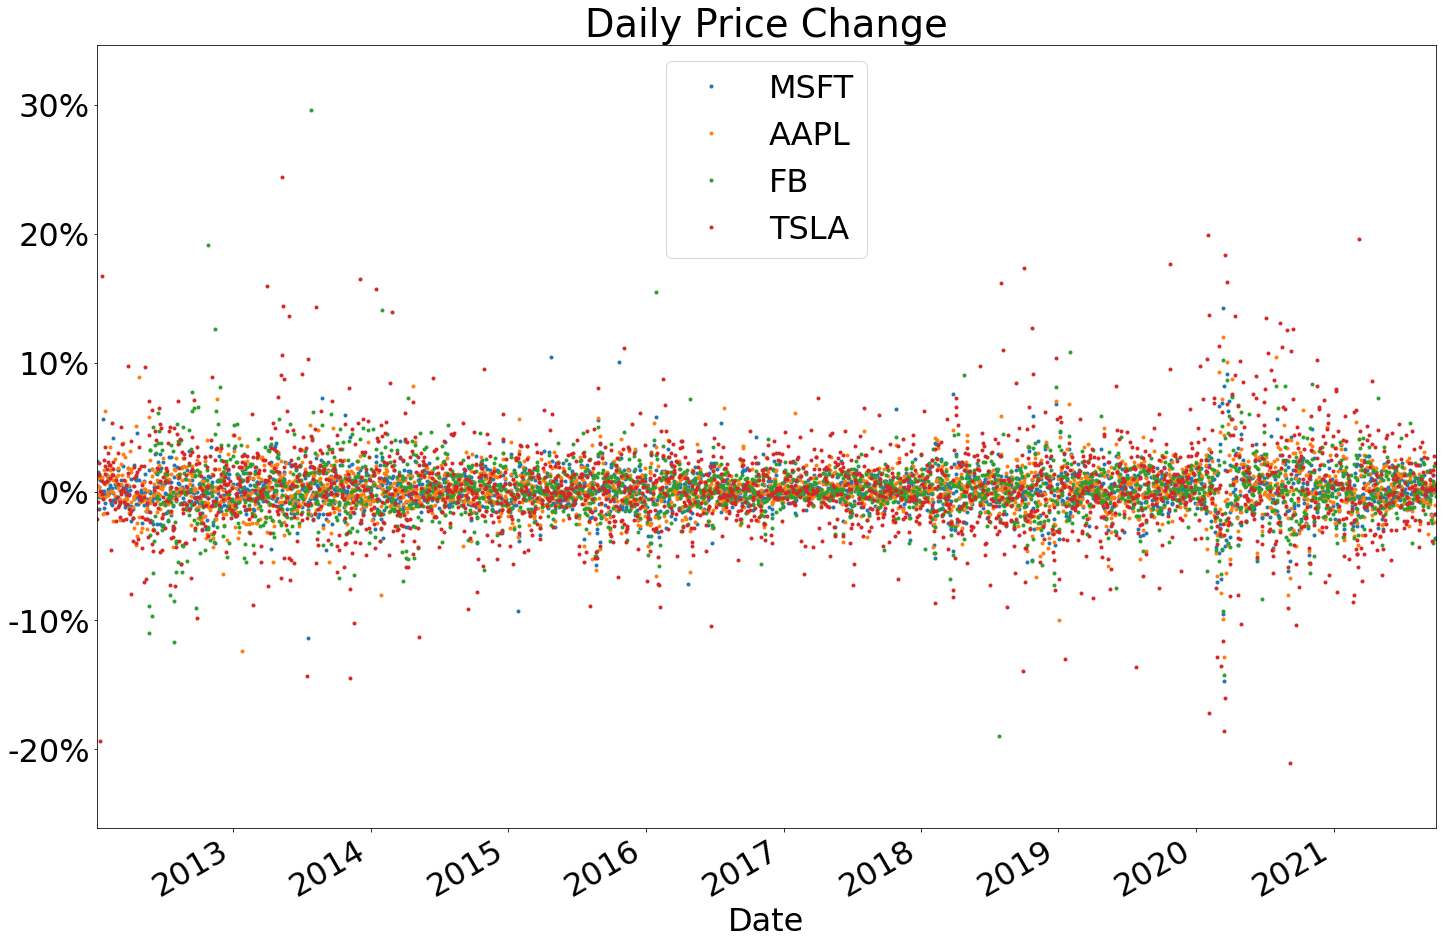

In [12]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax, legend = True)

plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

gathering stats

In [58]:
stats_df = gather_statistics(price_change_data)
stats_df

,MSFT,AAPL,FB,TSLA
mean,0.109,0.109,0.119,0.262
median,0.069,0.079,0.105,0.135
variance,2.595,3.217,5.373,12.257
S.D.,1.611,1.794,2.318,3.501
skewness,0.000,-0.000,0.000,-0.000
kurtosis,13.740,9.429,21.548,9.235


Histogram: 

<ipython-input-37-0571c30e9031>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


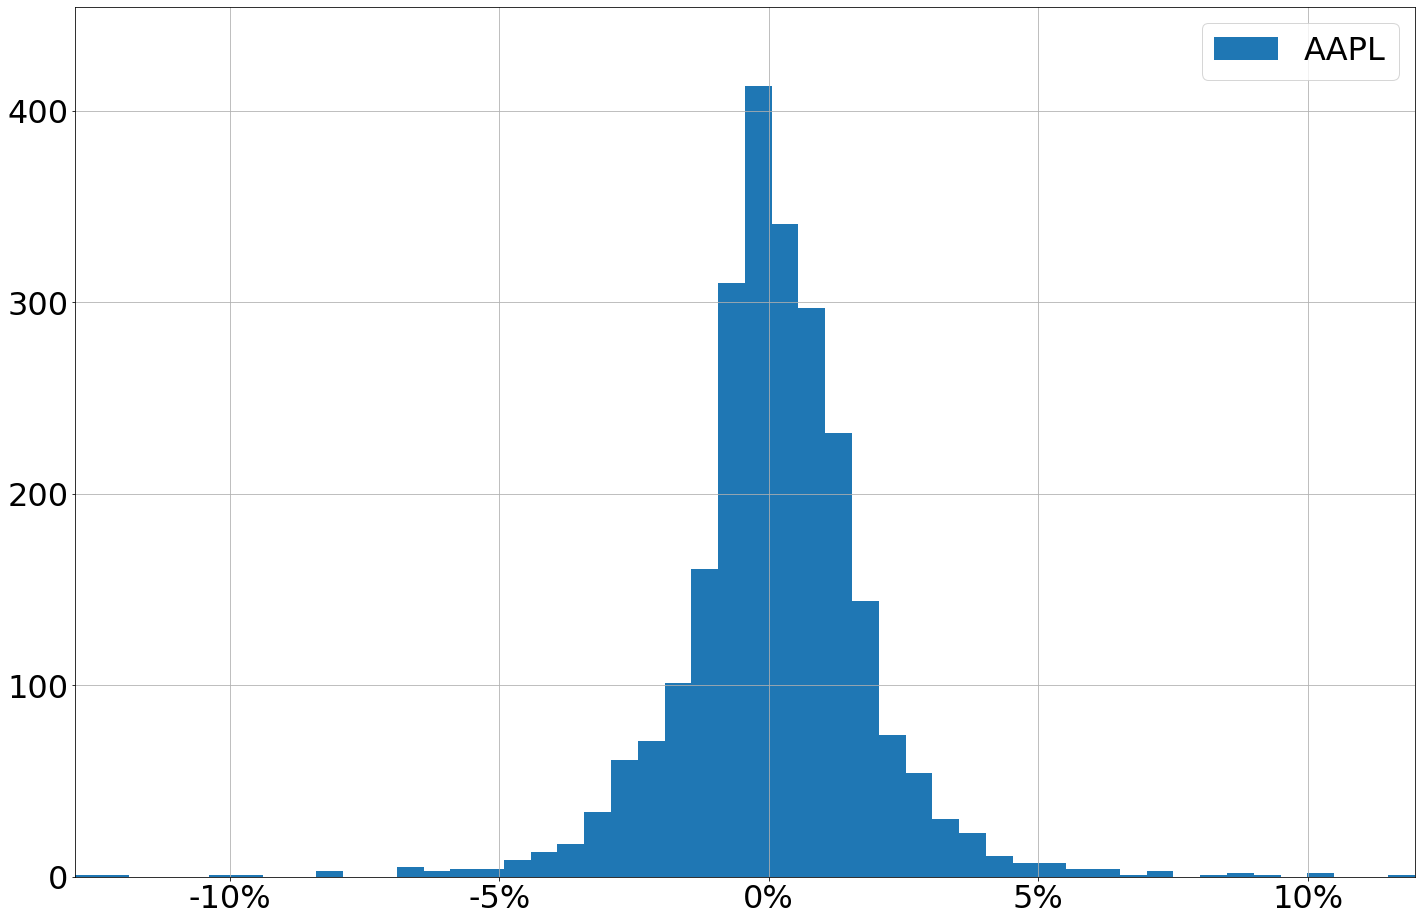

In [37]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

Density function: 

<ipython-input-38-0783a20ce82b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-38-0783a20ce82b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


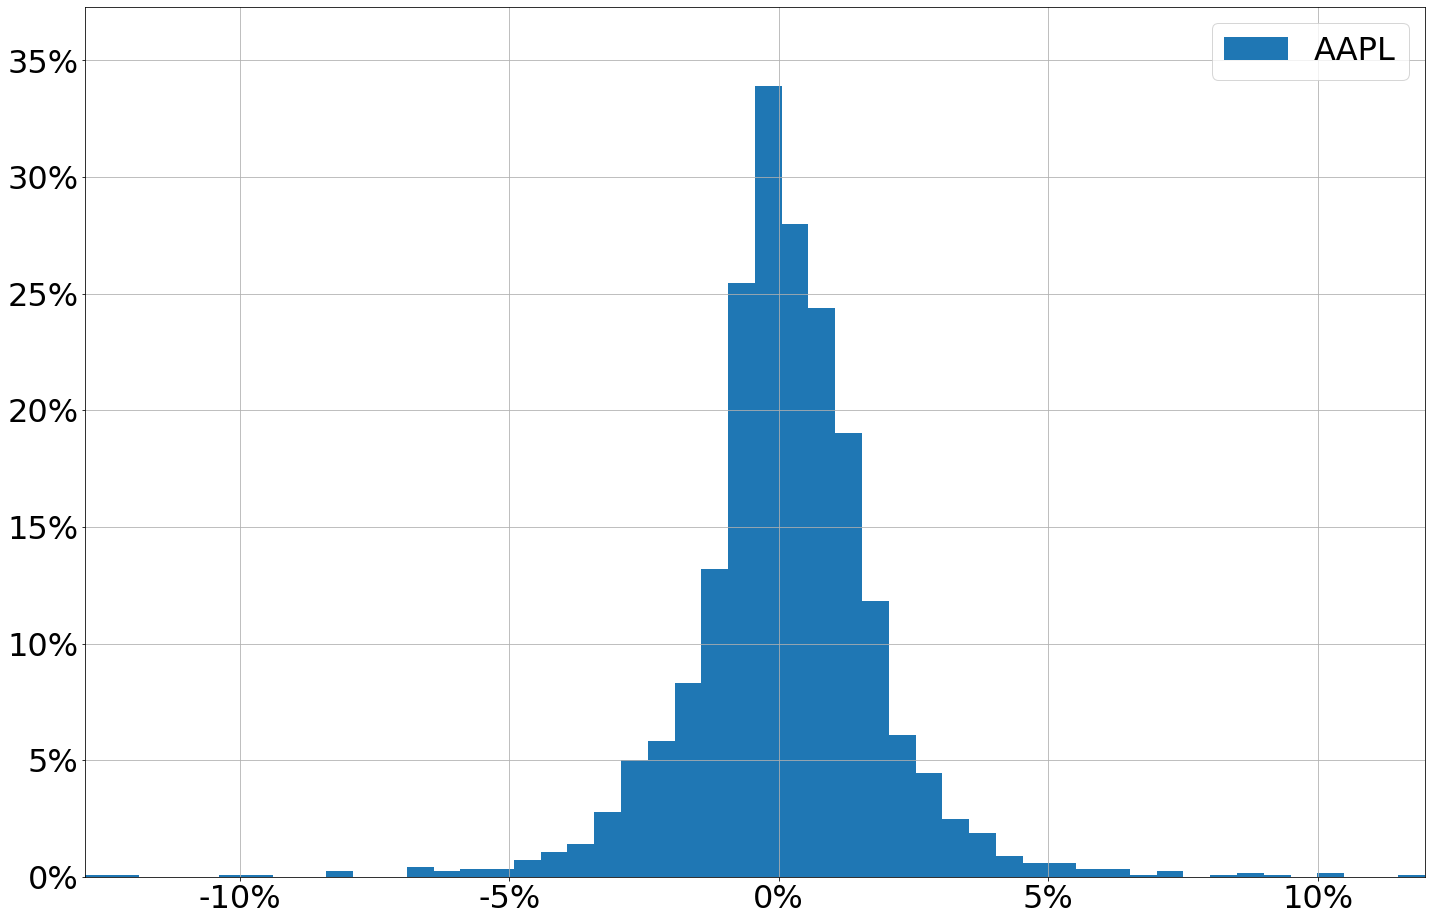

In [38]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

Multiple graphs in one figure : 

array([<AxesSubplot:title={'center':'MSFT'}>,
       <AxesSubplot:title={'center':'AAPL'}>,
       <AxesSubplot:title={'center':'FB'}>,
       <AxesSubplot:title={'center':'TSLA'}>], dtype=object)

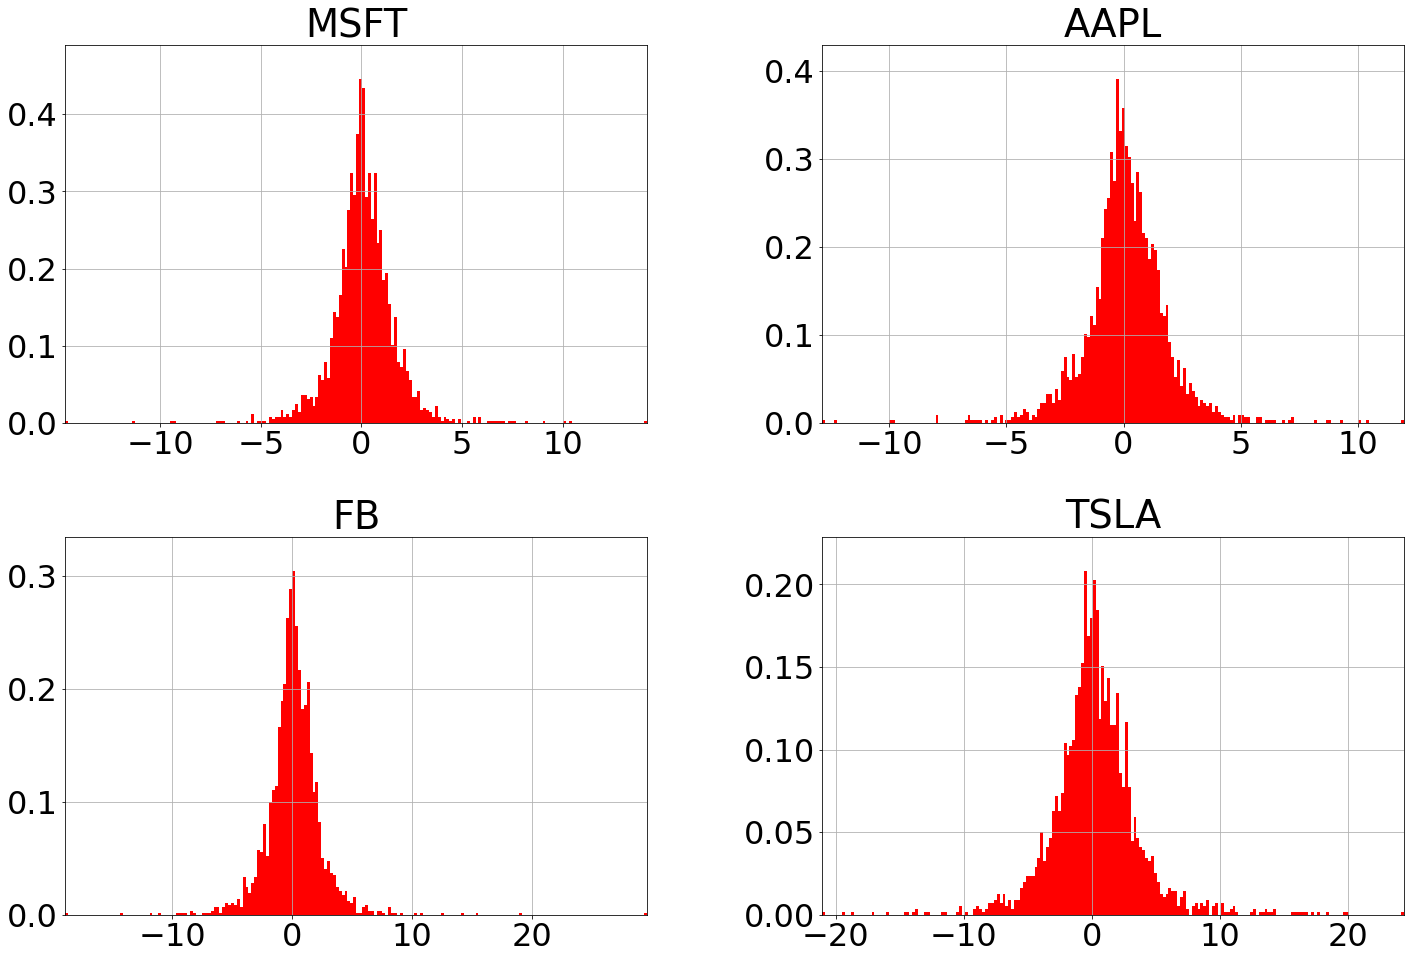

In [42]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 200, alpha = 1, label = price_change_data.keys(), ax = ax, density = True, color = 'r')

Axis labels should be changed to imply density function: 

<ipython-input-51-a1f8855c432c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+'%' for x in x_vals])
<ipython-input-51-a1f8855c432c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+'%' for y in y_vals])


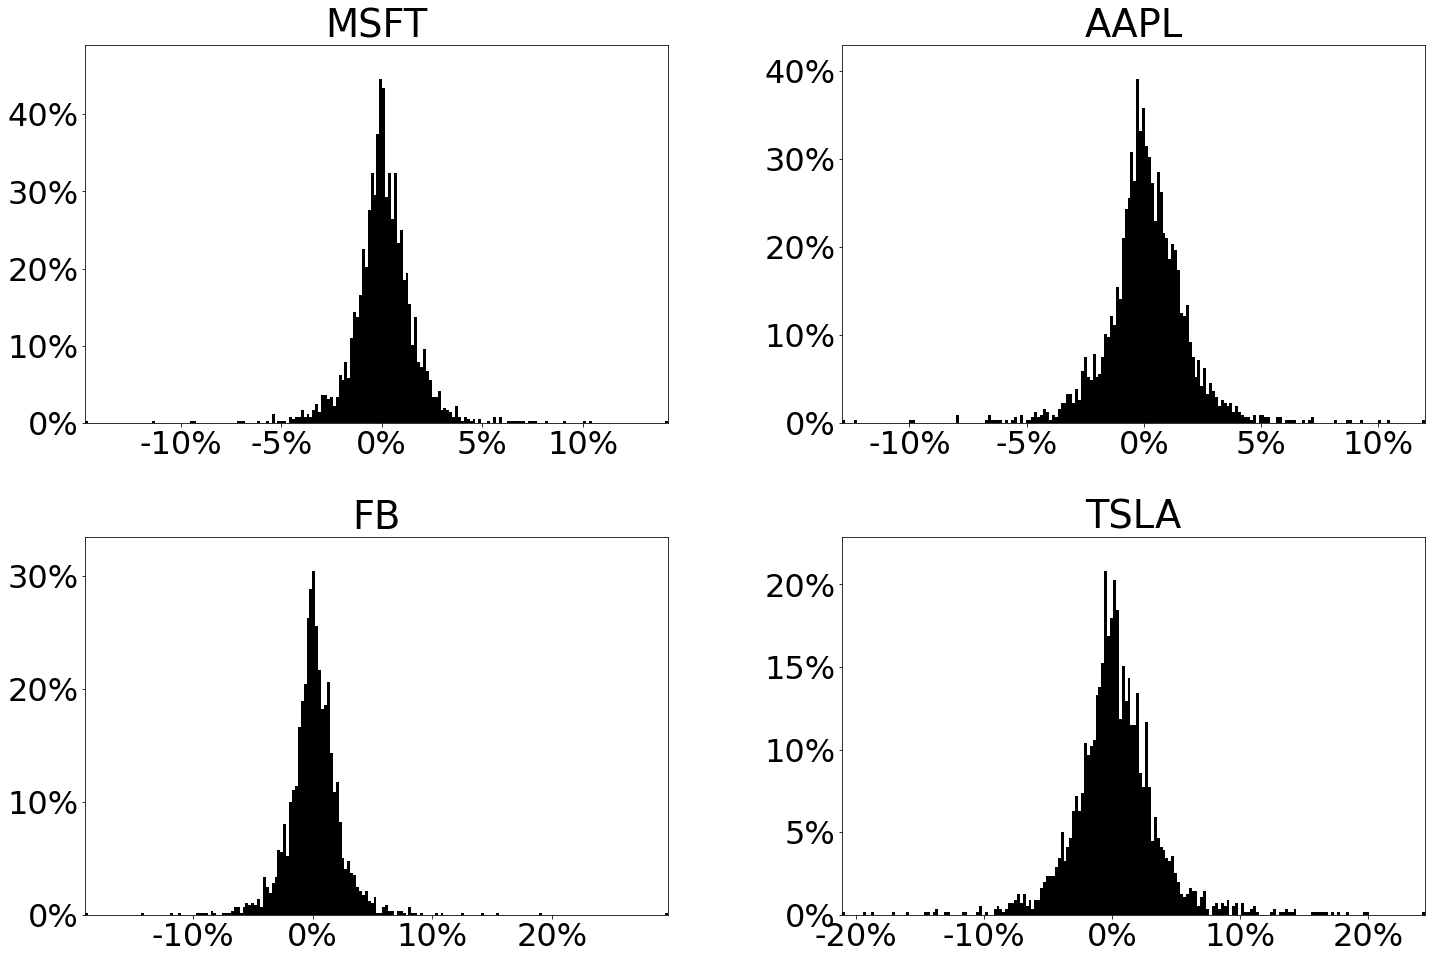

In [51]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 200, alpha = 1, label = price_change_data.keys(), ax = ax, density = True, color = 'k')
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+'%' for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+'%' for y in y_vals])
        a.grid(False)

<ipython-input-65-285815df7148>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels([str(int(x))+'%' for x in x_vals])
<ipython-input-65-285815df7148>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([str(int(y * 100))+'%' for y in y_vals])


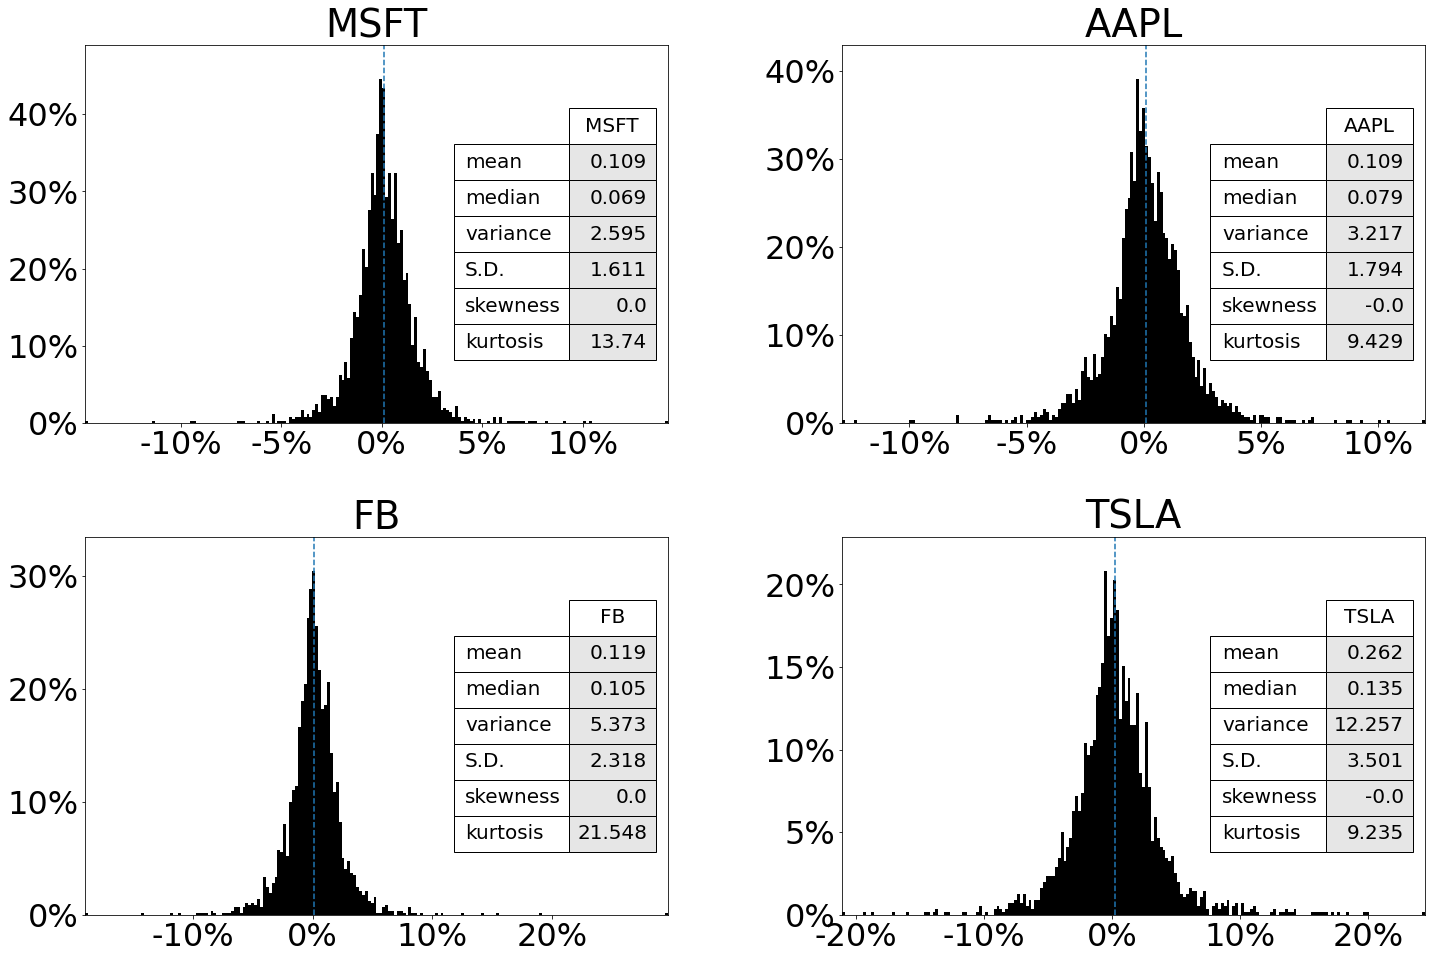

In [65]:
from pandas.plotting import table
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 200, alpha = 1, label = price_change_data.keys(), ax = ax, density = True, color = 'k')
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        a.set_title(stock)
        
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+'%' for x in x_vals])
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+'%' for y in y_vals])
        a.grid(False)
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats_table = table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats_table.scale(1.5,3)
        stats_table.auto_set_font_size(False)
        stats_table.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")

Nicer looking graphic with transparency

<ipython-input-66-d305d6dc1fc0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
<ipython-input-66-d305d6dc1fc0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])


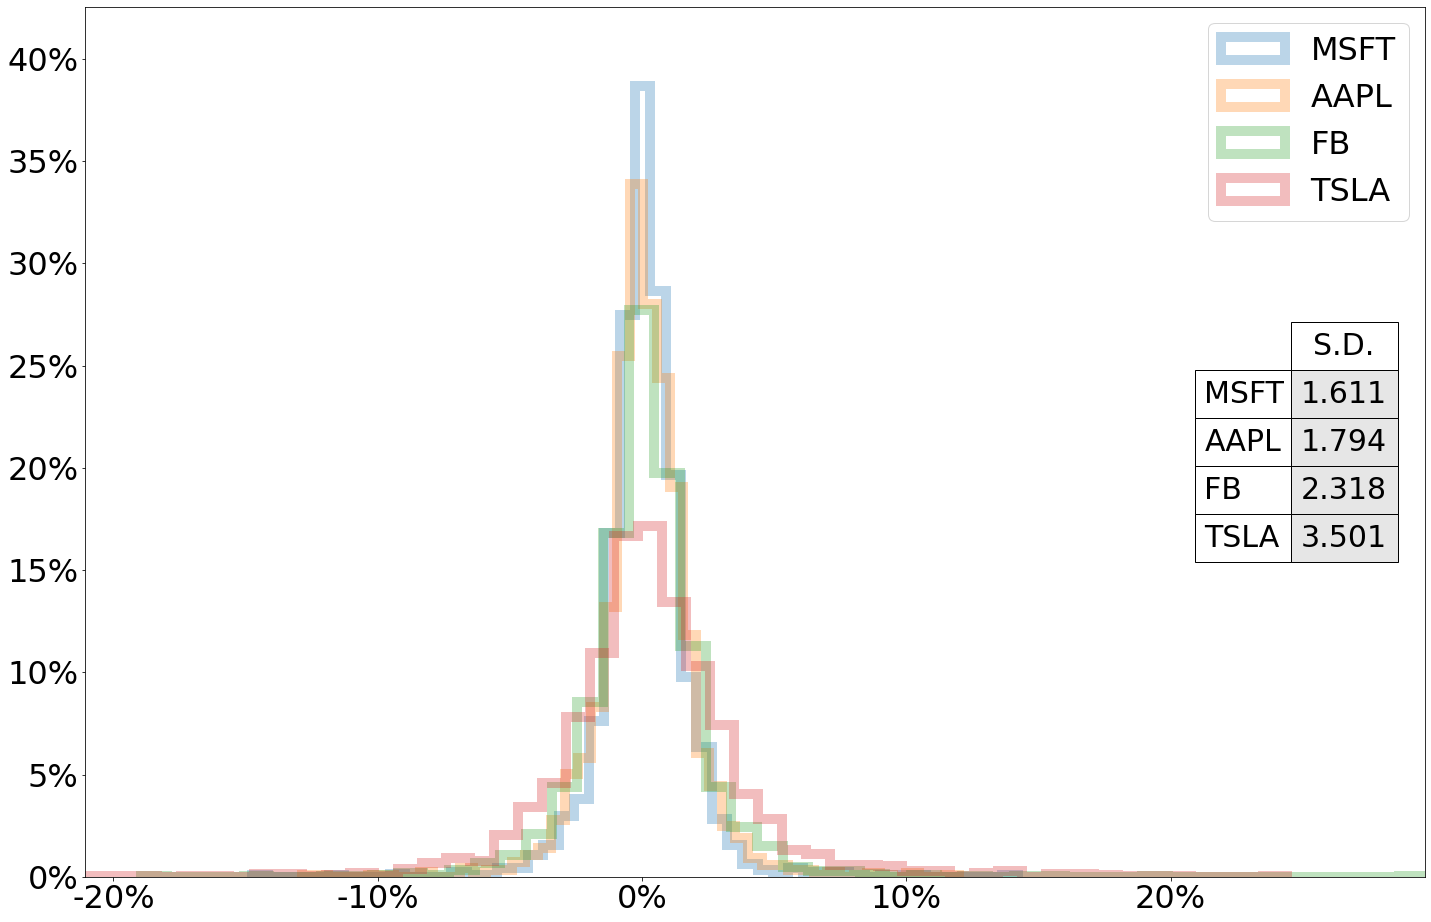

In [66]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()